In [1]:
# Loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from numpy import mean
#import xgboost as xgb

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
#import missingno as msno


import gc
# enable garbage collector to aid in memory 
gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data file and printing the data
bank_df = pd.read_csv("BankChurners.csv")
bank_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
# Printing information of dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### EDA of dataset

In [4]:
#Removing Unique identifier 
bank_df.drop('CLIENTNUM',axis=1,inplace=True)

In [5]:
# Getting the summary of bank dataframe
bank_df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

F    5358
M    4769
Name: Gender, dtype: int64


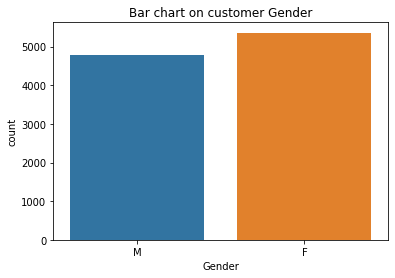

In [6]:
# Analysis and visualization of Gender
tb = bank_df['Gender'].value_counts()
print(tb)
ax = sns.countplot(x = 'Gender',  data=bank_df)
ax.set_title('Bar chart on customer Gender')
plt.show()

Bank has more Female customers than Male.

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


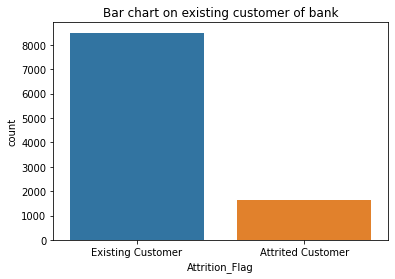

In [7]:
# Analysis and visualization of Customer still existing in bank
tb = bank_df['Attrition_Flag'].value_counts()
print(tb)
ax = sns.countplot(x = 'Attrition_Flag',  data=bank_df)
ax.set_title('Bar chart on existing customer of bank')
plt.show()

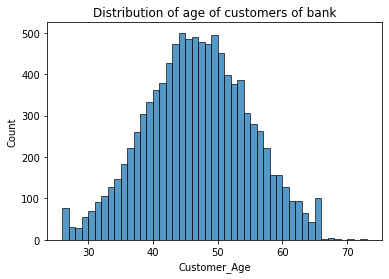

In [8]:
# Analysis and visualization of Average age  of  customers of bank
ax = sns.histplot(x = 'Customer_Age',  data=bank_df)
ax.set_title('Distribution of age of customers of bank')
plt.show()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


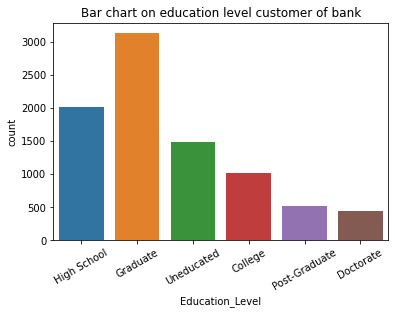

In [9]:
# Analysis and visualization of Customer education level
tb = bank_df['Education_Level'].value_counts()
print(tb)
ax = sns.countplot(x = 'Education_Level',  data=bank_df)
ax.set_title('Bar chart on education level customer of bank')
plt.xticks(rotation=30)
plt.show()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64


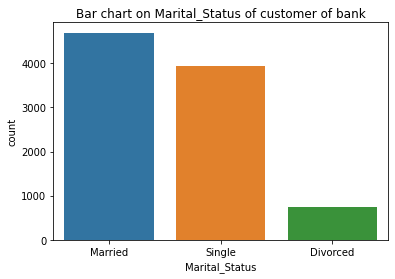

In [10]:
# Analysis and visualization of Marital_Status of Customer of bank
tb = bank_df['Marital_Status'].value_counts()
print(tb)
ax = sns.countplot(x = 'Marital_Status',  data=bank_df)
ax.set_title('Bar chart on Marital_Status of customer of bank')
plt.show()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64


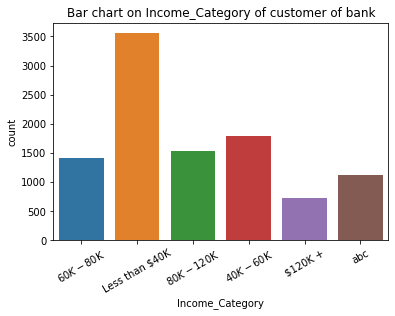

In [11]:
# Analysis and visualization of Income_Category of Customer of bank
tb = bank_df['Income_Category'].value_counts()
print(tb)
ax = sns.countplot(x = 'Income_Category',  data=bank_df)
ax.set_title('Bar chart on Income_Category of customer of bank')
plt.xticks(rotation=30)
plt.show()

We observe that there is category of abc in Income bracket for customers of bank . This naming of category doesnt help us.We rename the category to unknown/Not disclosed to identify such customers.

Less than $40K          3561
$40K - $60K             1790
$80K - $120K            1535
$60K - $80K             1402
Unknown/Notdisclosed    1112
$120K +                  727
Name: Income_Category, dtype: int64


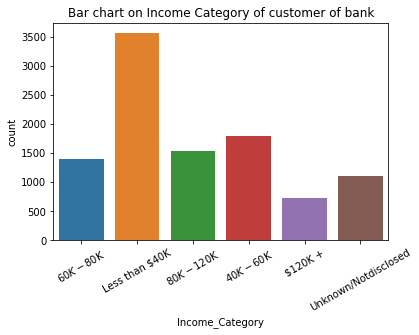

In [12]:
# Fixing unknown category data issue
bank_df["Income_Category"].replace({"abc": "Unknown/Notdisclosed"}, inplace=True)

tb = bank_df['Income_Category'].value_counts()
print(tb)
ax = sns.countplot(x = 'Income_Category',  data=bank_df)
ax.set_title('Bar chart on Income Category of customer of bank')
plt.xticks(rotation=30)
plt.show()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


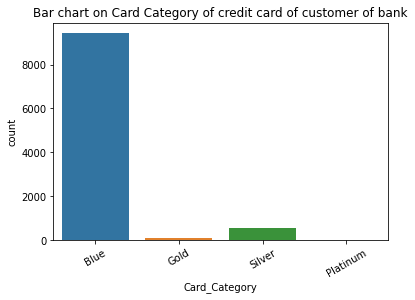

In [13]:
# Analysis and visualization of Card_Category of Customer of bank
tb = bank_df['Card_Category'].value_counts()
print(tb)
ax = sns.countplot(x = 'Card_Category',  data=bank_df)
ax.set_title('Bar chart on Card Category of credit card of customer of bank')
plt.xticks(rotation=30)
plt.show()

Majority of customers have Blue credit card and only handful have Platinum

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


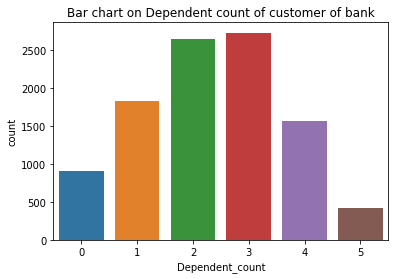

In [14]:
# Analysis and visualization of Card_Category of Customer of bank
tb = bank_df['Dependent_count'].value_counts()
print(tb)
ax = sns.countplot(x = 'Dependent_count',  data=bank_df)
ax.set_title('Bar chart on Dependent count of customer of bank')
plt.show()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


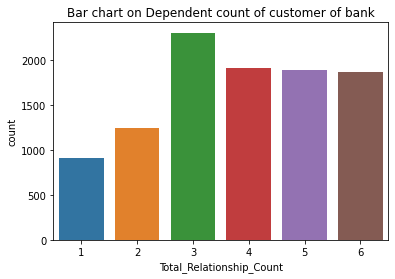

In [15]:
# Analysis and visualization of dependent count  of Customer of bank
tb = bank_df['Total_Relationship_Count'].value_counts()
print(tb)
ax = sns.countplot(x = 'Total_Relationship_Count',  data=bank_df)
ax.set_title('Bar chart on Dependent count of customer of bank')
plt.show()

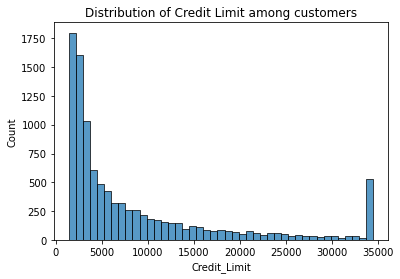

In [16]:
# Analysis and visualization of Average age  of  customers of bank
ax = sns.histplot(x = 'Credit_Limit',  data=bank_df)
ax.set_title('Distribution of Credit Limit among customers')
plt.show()

It looks like the bank has some kind of policy with credit limit at 35k which is causing some abnormal behaviour of the credit limit distribution.

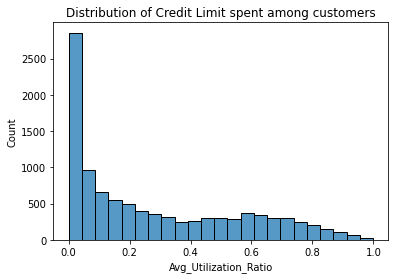

In [17]:
# Analysis and visualization of Average age  of  customers of bank
ax = sns.histplot(x = 'Avg_Utilization_Ratio',  data=bank_df)
ax.set_title('Distribution of Credit Limit spent among customers')
plt.show()

##### Bivariate Analysis

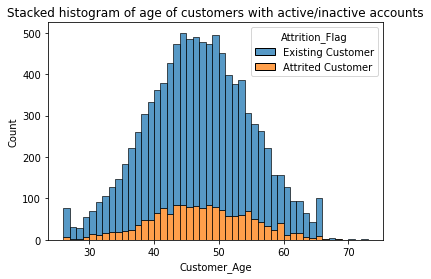

In [18]:
# Visualization of age of customers with active accounts
ax = sns.histplot(x = 'Customer_Age', hue='Attrition_Flag', data=bank_df, multiple="stack")
ax.set_title('Stacked histogram of age of customers with active/inactive accounts')
plt.show()

It seems the attired customer are distributed along all the age 

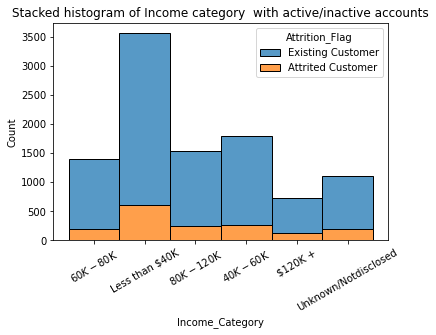

In [19]:
# Visualization of of Income category  with active/inactive accounts
ax = sns.histplot(x = 'Income_Category', hue='Attrition_Flag', data=bank_df, multiple="stack")
ax.set_title('Stacked histogram of Income category  with active/inactive accounts')
plt.xticks(rotation=30)
plt.show()

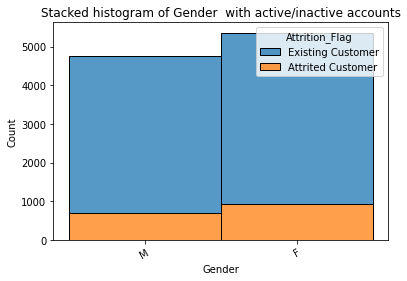

In [20]:
# Visualization of of Income category  with active/inactive accounts
ax = sns.histplot(x = 'Gender', hue='Attrition_Flag', data=bank_df, multiple="stack")
ax.set_title('Stacked histogram of Gender  with active/inactive accounts')
plt.xticks(rotation=30)
plt.show()

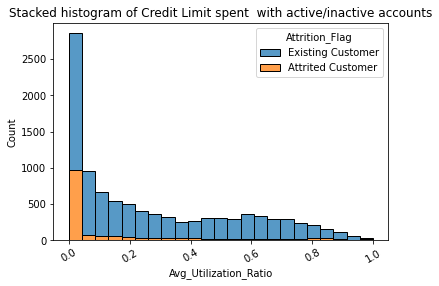

In [21]:
# Visualization of of Income category  with active/inactive accounts
ax = sns.histplot(x = 'Avg_Utilization_Ratio', hue='Attrition_Flag', data=bank_df, multiple="stack")
ax.set_title('Stacked histogram of Credit Limit spent  with active/inactive accounts')
plt.xticks(rotation=30)
plt.show()

Expect the few outliers majority of customers who are not existing customers haven't spent any money of their credit card limit.

### Data Pre-processing

##### Missing value treatment 

In [22]:
# Checking missing values in dataframe
bank_df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Only two columns has missing values. We will treat them by filling mode of their corresponding categories.

In [23]:
#Fill the missing values with the most frequent value 
mode_education = bank_df.mode()['Education_Level'][0]
bank_df['Education_Level'] = bank_df['Education_Level'].fillna(value=mode_education)
mode_martial = bank_df.mode()['Marital_Status'][0]
bank_df['Marital_Status'] = bank_df['Marital_Status'].fillna(value=mode_martial)
bank_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

##### Categorical features encoding

Since all the categorical features in the datasets are Nominal, we need to do dummy encoding before applying machine learning

In [24]:
# Performing dummy encoding of categorical features
bank_df["Attrition_Flag"].replace({"Attrited Customer": 0 , "Existing Customer": 1}, inplace=True)
y_feature = bank_df['Attrition_Flag']
bank_df.drop(['Attrition_Flag'] , axis=1,inplace=True)
bank_df=pd.get_dummies(data=bank_df,drop_first=True)
bank_df

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Marital_Status_Married  \
0              11914.0                 1.335  ...                       1   
1               7392.0                 1.541  ...                       0   
2               3418.0                 2.594  ...                       1   
3                796.0                 1.405  ...                       1   
4               4716.0                 2.175  ...                       1   
...                ...                   ...  ...                     ...   
10122           2152.0                 0.703  ...                       0   
10123           2091.0                 0.804  ...                       0   
10124           5409.0                 0.819  ...                       1   
10125           5281.0                 0.535  ...                       1   
10126           8427.0                 0.703  ...                       1   

       Marital_Status_Single  Income_Category_$40K - $60K  \
0                          0                            0   
1                          1                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
...                      ...                          ...   
10122                      1                            1   
10123                      0                            1   
10124                      0                            0   
10125                      0                            1   
10126                      0                            0   

       Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                                1                             0   
1                         

In [25]:
# Splitting the dataset into training and testing
x_features = bank_df

X_temp, X_test, y_temp, y_test = train_test_split(x_features, y_feature, test_size=0.2, random_state=0, stratify = y_feature)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0, stratify = y_temp)


Splitting the data into train, test and validation to avoid any kind of data leakage.

### Model building

##### Building base models using pipelines

In [26]:
#Using default for Inital Modelling 

#Setting up pipelines for required 6 models 
pipe_lr = Pipeline([('clflr', LogisticRegression(random_state=0))])
pipe_dt = Pipeline([('clfdt', DecisionTreeClassifier(random_state=0))])
pipe_rf = Pipeline([('clfrf', RandomForestClassifier(random_state=0))])
pipe_bg = Pipeline([('clfbg', BaggingClassifier(random_state=0))])
pipe_adaboost = Pipeline([('clfada',AdaBoostClassifier())])
pipe_gradientboost = Pipeline([('clfgb',GradientBoostingClassifier())]) 

In [27]:
#Default Grid params for logistic regression
grid_params_lr = [{'clflr__penalty': ['l1'],
                   'clflr__C': [1.0],
                   'clflr__solver': ['liblinear']}] 

#Default Grid params for Random Forest
grid_params_rf = [{'clfrf__criterion': ['gini'],
                   'clfrf__min_samples_leaf': [3],
                  'clfrf__max_depth': [3]}]

# Default Grid params for decision tree
grid_params_dt = [{'clfdt__criterion': ['gini'],
                   'clfdt__min_samples_leaf': [3],
                   'clfdt__max_depth': [3]}]

# Default Grid params for Bagging Classifier 
grid_params_bagging = [{'clfbg__n_estimators':[10]}]

# Default Grid params for Adaboost
grid_params_ada = [{'clfada__n_estimators': [2],
                    'clfada__learning_rate': [0.1] }]

# Default Grid params for gradientboost
grid_params_gb = [{'clfgb__n_estimators': [10],
                    'clfgb__learning_rate': [0.1] }]

In [28]:
# Getting all the metrics for model performance evaludation
scoring_metrics = {"Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score),
           "F1": make_scorer(f1_score), "ROC_AUC": make_scorer(roc_auc_score) }

In [29]:
#Using gridsearchCV with 5 fold cross validation in a pipeline
gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=grid_params_lr, scoring='accuracy',cv=5)
gs_dt = GridSearchCV(estimator=pipe_dt, param_grid=grid_params_dt, scoring='accuracy',cv=5)
gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=grid_params_rf, scoring='accuracy',cv=5)
gs_bagging = GridSearchCV(estimator=pipe_bg, param_grid=grid_params_bagging, scoring='accuracy',cv=5)
gs_ada = GridSearchCV(estimator=pipe_adaboost, param_grid=grid_params_ada, scoring='accuracy',cv=5)
gs_gb = GridSearchCV(estimator=pipe_gradientboost, param_grid=grid_params_gb, scoring='accuracy',cv=5)

In [30]:
# List of pipelines for ease of iteration
grids = [gs_lr,gs_dt,gs_rf,gs_bagging,gs_ada,gs_gb]
grid_dict = {0: 'Logistic Regression',
             1:'Decision Tree',
             2: 'Random Forest',  
             3:'Bagging Classifier',
             4:'AdaBoost',
             5:'Graident Bossting',
             }

In [31]:
#Inital Model
for idx, gs in enumerate(grids):
    gs.fit(X_train, y_train)
    y_pred_val = gs.predict(X_val)
    print('\nEstimator: %s' % grid_dict[idx])
    print('Val set accuracy score: %.3f ' 
              % accuracy_score(y_val, y_pred_val))
    print('f1-score on Val set: {0:0.3f}'. format(f1_score(y_val, y_pred_val)))
    print('Recall Score on Val set : {0:0.3f}'.format(recall_score(y_val, y_pred_val)))
    y_pred_test = gs.predict(X_test)
    print('Test set accuracy score: %.3f ' 
              % accuracy_score(y_test, y_pred_test))
    print('f1-score on Test set: {0:0.3f}'. format(f1_score(y_test, y_pred_test)))
    print('Recall Score on Test set : {0:0.3f}'.format(recall_score(y_test, y_pred_test)))


Estimator: Logistic Regression
Val set accuracy score: 0.904 
f1-score on Val set: 0.945
Recall Score on Val set : 0.970
Test set accuracy score: 0.897 
f1-score on Test set: 0.940
Recall Score on Test set : 0.965

Estimator: Decision Tree
Val set accuracy score: 0.911 
f1-score on Val set: 0.947
Recall Score on Val set : 0.951
Test set accuracy score: 0.913 
f1-score on Test set: 0.948
Recall Score on Test set : 0.950

Estimator: Random Forest
Val set accuracy score: 0.885 
f1-score on Val set: 0.935
Recall Score on Val set : 0.996
Test set accuracy score: 0.885 
f1-score on Test set: 0.936
Recall Score on Test set : 0.992

Estimator: Bagging Classifier
Val set accuracy score: 0.960 
f1-score on Val set: 0.976
Recall Score on Val set : 0.975
Test set accuracy score: 0.960 
f1-score on Test set: 0.976
Recall Score on Test set : 0.979

Estimator: AdaBoost
Val set accuracy score: 0.839 
f1-score on Val set: 0.912
Recall Score on Val set : 1.000
Test set accuracy score: 0.840 
f1-score o

### Model building - Oversampled data

In [32]:
#Oversampling using SMOTE
os_pipe_lr = ImblearnPipeline([('sampling', SMOTE()),('clflr', LogisticRegression(random_state=0))])
os_pipe_dt = ImblearnPipeline([('sampling', SMOTE()),('clfdt', DecisionTreeClassifier(random_state=0))])
os_pipe_rf = ImblearnPipeline([('sampling', SMOTE()),('clfrf', RandomForestClassifier(random_state=0))])
os_pipe_bg = ImblearnPipeline([('sampling', SMOTE()),('clfbg', BaggingClassifier(random_state=0))])
os_pipe_adaboost = ImblearnPipeline([('sampling', SMOTE()),('clfada',AdaBoostClassifier())])
os_pipe_gradientboost = ImblearnPipeline([('sampling', SMOTE()),('clfgb',GradientBoostingClassifier())]) 

In [33]:
#Using Pipeline GridSearchCV and SMOTE 
os_gs_lr = GridSearchCV(estimator=os_pipe_lr, param_grid=grid_params_lr, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
os_gs_dt = GridSearchCV(estimator=os_pipe_dt, param_grid=grid_params_dt, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
os_gs_rf = GridSearchCV(estimator=os_pipe_rf, param_grid=grid_params_rf, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
os_gs_bagging = GridSearchCV(estimator=os_pipe_bg, param_grid=grid_params_bagging, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
os_gs_ada = GridSearchCV(estimator=os_pipe_adaboost, param_grid=grid_params_ada, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
os_gs_gb = GridSearchCV(estimator=os_pipe_gradientboost, param_grid=grid_params_gb, scoring=scoring_metrics,cv=5,refit="ROC_AUC")


In [34]:
#Model using Oversampling
os_grids = [os_gs_lr,os_gs_dt,os_gs_rf,os_gs_bagging,os_gs_ada,os_gs_gb]
for idx, gs in enumerate(os_grids):
    gs.fit(X_train, y_train)
    y_pred_val = gs.predict(X_val)
    print('\nEstimator: %s' % grid_dict[idx])
    print('Oversampled Val set accuracy score: %.3f ' 
              % accuracy_score(y_val, y_pred_val))
    print('Oversampled f1-score on Val set: {0:0.3f}'. format(f1_score(y_val, y_pred_val)))
    print('Oversampled Recall Score on Val set : {0:0.3f}'.format(recall_score(y_val, y_pred_val)))
    y_pred_test = gs.predict(X_test)
    print('Oversampled Val set accuracy score: %.3f ' 
              % accuracy_score(y_test, y_pred_test))
    print('Oversampled f1-score on Val set: {0:0.3f}'. format(f1_score(y_test, y_pred_test)))
    print('Oversampled Recall Score on Val set : {0:0.3f}'.format(recall_score(y_test, y_pred_test)))


Estimator: Logistic Regression
Oversampled Val set accuracy score: 0.893 
Oversampled f1-score on Val set: 0.936
Oversampled Recall Score on Val set : 0.936
Oversampled Val set accuracy score: 0.881 
Oversampled f1-score on Val set: 0.929
Oversampled Recall Score on Val set : 0.927

Estimator: Decision Tree
Oversampled Val set accuracy score: 0.840 
Oversampled f1-score on Val set: 0.897
Oversampled Recall Score on Val set : 0.829
Oversampled Val set accuracy score: 0.845 
Oversampled f1-score on Val set: 0.900
Oversampled Recall Score on Val set : 0.838

Estimator: Random Forest
Oversampled Val set accuracy score: 0.886 
Oversampled f1-score on Val set: 0.929
Oversampled Recall Score on Val set : 0.896
Oversampled Val set accuracy score: 0.882 
Oversampled f1-score on Val set: 0.927
Oversampled Recall Score on Val set : 0.894

Estimator: Bagging Classifier
Oversampled Val set accuracy score: 0.956 
Oversampled f1-score on Val set: 0.973
Oversampled Recall Score on Val set : 0.961
Ove

### Model building - Undersampled data

In [35]:
#Undersampling Using RandomUnderSampler
us_pipe_lr = ImblearnPipeline([('sampling', RandomUnderSampler()),('clflr', LogisticRegression(random_state=0))])
us_pipe_dt = ImblearnPipeline([('sampling', RandomUnderSampler()),('clfdt', DecisionTreeClassifier(random_state=0))])
us_pipe_rf = ImblearnPipeline([('sampling', RandomUnderSampler()),('clfrf', RandomForestClassifier(random_state=0))])
us_pipe_bg = ImblearnPipeline([('sampling', RandomUnderSampler()),('clfbg', BaggingClassifier(random_state=0))])
us_pipe_adaboost = ImblearnPipeline([('sampling', RandomUnderSampler()),('clfada',AdaBoostClassifier())])
us_pipe_gradientboost = ImblearnPipeline([('sampling', RandomUnderSampler()),('clfgb',GradientBoostingClassifier())]) 

In [36]:
#Using pipeine and RandomUnderSampler
us_gs_lr = GridSearchCV(estimator=us_pipe_lr, param_grid=grid_params_lr, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
us_gs_dt = GridSearchCV(estimator=us_pipe_dt, param_grid=grid_params_dt, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
us_gs_rf = GridSearchCV(estimator=us_pipe_rf, param_grid=grid_params_rf, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
us_gs_bagging = GridSearchCV(estimator=us_pipe_bg, param_grid=grid_params_bagging, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
us_gs_ada = GridSearchCV(estimator=us_pipe_adaboost, param_grid=grid_params_ada, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
us_gs_gb = GridSearchCV(estimator=us_pipe_gradientboost, param_grid=grid_params_gb, scoring=scoring_metrics,cv=5,refit="ROC_AUC")

In [37]:
#Undersampling Model
us_grids = [us_gs_lr,us_gs_dt,us_gs_rf,us_gs_bagging,us_gs_ada,us_gs_gb]
for idx, gs in enumerate(us_grids):
    gs.fit(X_train, y_train)
    y_pred_val = gs.predict(X_val)
    print('\nEstimator: %s' % grid_dict[idx])
    print('Undersampled Val set accuracy score: %.3f ' 
              % accuracy_score(y_val, y_pred_val))
    print('Undersampled f1-score on Val set: {0:0.3f}'. format(f1_score(y_val, y_pred_val)))
    print('Undersampled Recall Score on Val set : {0:0.3f}'.format(recall_score(y_val, y_pred_val)))
    y_pred_test = gs.predict(X_test)
    print('Undersampled test set accuracy score: %.3f ' 
              % accuracy_score(y_test, y_pred_test))
    print('Undersampled f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred_test)))
    print('Undersampled Recall Score on test set : {0:0.3f}'.format(recall_score(y_test, y_pred_test)))


Estimator: Logistic Regression
Undersampled Val set accuracy score: 0.843 
Undersampled f1-score on Val set: 0.899
Undersampled Recall Score on Val set : 0.835
Undersampled test set accuracy score: 0.834 
Undersampled f1-score on test set: 0.894
Undersampled Recall Score on test set : 0.830

Estimator: Decision Tree
Undersampled Val set accuracy score: 0.891 
Undersampled f1-score on Val set: 0.934
Undersampled Recall Score on Val set : 0.921
Undersampled test set accuracy score: 0.898 
Undersampled f1-score on test set: 0.938
Undersampled Recall Score on test set : 0.925

Estimator: Random Forest
Undersampled Val set accuracy score: 0.870 
Undersampled f1-score on Val set: 0.918
Undersampled Recall Score on Val set : 0.868
Undersampled test set accuracy score: 0.857 
Undersampled f1-score on test set: 0.910
Undersampled Recall Score on test set : 0.857

Estimator: Bagging Classifier
Undersampled Val set accuracy score: 0.918 
Undersampled f1-score on Val set: 0.949
Undersampled Recal

### Hyperparameter tuning using random search

We are using linear regression, decision tree, and Ada boost Models for tunning as they were underfitting with the default parameters, and can be improved with hyperparameter tunning.

In [38]:
# Tunning params
param_range = [3,5,7,9]

# Grid params for linear model
grid_params_lr_tune = [{'clflr__penalty': ['l1', 'l2'],
                   'clflr__C': [1.0, 0.5, 0.1],
                   'clflr__solver': ['liblinear']}] 


# Grid params for decision tree
grid_params_dt_tune = [{'clfdt__criterion': ['gini', 'entropy'],
                   'clfdt__min_samples_leaf': param_range,
                   'clfdt__max_depth': param_range}]

# Grid params for Adaboost
grid_params_ada_tune = [{'clfada__n_estimators': np.arange(10,300,20),
                    'clfada__learning_rate': [0.01, 0.05, 0.1, 1] }]


In [39]:
#Using RandomizedSearchCV for tuning Hyperparameters
tune_gs_lr = RandomizedSearchCV(estimator=pipe_lr, param_distributions=grid_params_lr_tune, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
tune_gs_dt = RandomizedSearchCV(estimator=pipe_dt, param_distributions=grid_params_dt_tune, scoring=scoring_metrics,cv=5,refit="ROC_AUC")
tune_gs_ada = RandomizedSearchCV(estimator=pipe_adaboost, param_distributions=grid_params_ada_tune, scoring=scoring_metrics,cv=5,refit="ROC_AUC")

### Model Performances

In [40]:
#Models after hypertuning
tune_grids=[tune_gs_lr,tune_gs_dt,tune_gs_ada]
grid_dict = {0: 'Logistic Regression',
             1:'Decision Tree',
             2:'AdaBoost'}
for idx, gs in enumerate(tune_grids):
    gs.fit(X_train, y_train)
    print('\nEstimator: %s' % grid_dict[idx])
    print('Best params: %s' % gs.best_params_)
    y_pred_val = gs.predict(X_val)
    print('\nEstimator: %s' % grid_dict[idx])
    print('Val set accuracy score: %.3f ' 
              % accuracy_score(y_val, y_pred_val))
    print('f1-score on Val set: {0:0.3f}'. format(f1_score(y_val, y_pred_val)))
    print('Recall Score on Val set : {0:0.3f}'.format(recall_score(y_val, y_pred_val)))
    y_pred_test = gs.predict(X_test)
    print('Test set accuracy score: %.3f ' 
              % accuracy_score(y_test, y_pred_test))
    print('f1-score on Test set: {0:0.3f}'. format(f1_score(y_test, y_pred_test)))
    print('Recall Score on Test set : {0:0.3f}'.format(recall_score(y_test, y_pred_test)))


Estimator: Logistic Regression
Best params: {'clflr__solver': 'liblinear', 'clflr__penalty': 'l1', 'clflr__C': 0.5}

Estimator: Logistic Regression
Val set accuracy score: 0.904 
f1-score on Val set: 0.944
Recall Score on Val set : 0.969
Test set accuracy score: 0.894 
f1-score on Test set: 0.939
Recall Score on Test set : 0.965

Estimator: Decision Tree
Best params: {'clfdt__min_samples_leaf': 7, 'clfdt__max_depth': 9, 'clfdt__criterion': 'gini'}

Estimator: Decision Tree
Val set accuracy score: 0.943 
f1-score on Val set: 0.966
Recall Score on Val set : 0.965
Test set accuracy score: 0.936 
f1-score on Test set: 0.962
Recall Score on Test set : 0.966

Estimator: AdaBoost
Best params: {'clfada__n_estimators': 290, 'clfada__learning_rate': 1}

Estimator: AdaBoost
Val set accuracy score: 0.963 
f1-score on Val set: 0.978
Recall Score on Val set : 0.981
Test set accuracy score: 0.956 
f1-score on Test set: 0.974
Recall Score on Test set : 0.982


### Productionize the model

After tunning the 3 models and comparing their performances with each other, we can conclude that the Ada boost model performed best on test set with an f1-score of 0.974. Therefore, we can pick Adaboost as the final model and put into production using the following pipeline.

In [41]:
# Pipeline for Adaboost model with hyper parameter tunning
grid_params_ada_tune = [{'clfada__n_estimators': np.arange(10,300,20),
                    'clfada__learning_rate': [0.01, 0.05, 0.1, 1] }]

tune_gs_ada = RandomizedSearchCV(estimator=pipe_adaboost,
                                 param_distributions=grid_params_ada_tune, 
                                 scoring=scoring_metrics,
                                 cv=5,
                                 refit="ROC_AUC")
tune_gs_ada.fit(X_train, y_train)
y_pred_test = gs.predict(X_test)
print('f1-score on Test set: {0:0.3f}'. format(f1_score(y_test, y_pred_test)))

f1-score on Test set: 0.974


### Actionable Insights & Recommendations

Most of the insights are covered throughout the report with the tables and visaulizations. However, from the final classification model, we can classify the potential customers who're likely to churn in the future. This final model is re-usable and can be run multiple times with fresh data. 